In [ ]:
# Create dataframes of each image type

start = datetime(2020, 3,7)

dcms = ['DCM-MANATEE', 'DCM-WALRUS', 'DCM-SEAL', 'DCM-OTTER', 'DCM-PORPOISE', 'DCM-DOLPHIN']
# filter images by robot_name, image type, crop, etc

filters = {"artifacts.kind": "nrg", "crop_name": {"$in": ['SOYBEANS', 'CORN', 'COTTON']}, 'robot_name':{"$in":dcms}}
nrg_df, elapsed_time = f.get_shasta_data(filters =filters, start=start)
nrg_df['date_collected'] = pd.to_datetime(nrg_df['collected_on'].dt.date)
print(f"Returned {len(nrg_df)} nrg images in {elapsed_time:.2f} s.")

filters = {"artifacts.kind": "rgb", "crop_name": {"$in": ['SOYBEANS', 'CORN', 'COTTON']}, 'robot_name':{"$in":dcms}}
rgb_df, elapsed_time = f.get_shasta_data(filters =filters, start=start)
rgb_df['date_collected'] = pd.to_datetime(rgb_df['collected_on'].dt.date)
print(f"Returned {len(rgb_df)} rgb images in {elapsed_time:.2f} s.")

filters = {"artifacts.kind": "raw", "crop_name": {"$in": ['SOYBEANS', 'CORN', 'COTTON']}, 'robot_name':{"$in":dcms}}
raw_df, elapsed_time = f.get_shasta_data(filters =filters, start=start)
raw_df['date_collected'] = pd.to_datetime(raw_df['collected_on'].dt.date)
print(f"Returned {len(raw_df)} raw images in {elapsed_time:.2f} s.")

In [ ]:
qdf = nrg_df.copy()
fields = qdf.operating_field_name.unique()

raw = []
nrg = []
rgb = []
robot = []

for f in fields:
    raw.append(len(raw_df[raw_df['operating_field_name'] ==f]))
    nrg.append(len(nrg_df[nrg_df['operating_field_name'] ==f]))
    rgb.append(len(rgb_df[rgb_df['operating_field_name'] ==f]))
    if len(qdf[qdf['operating_field_name']==f].robot_name.unique())==1:
        robot.append(str(qdf[qdf['operating_field_name']==f].robot_name.unique()))
    else:
        robot.append('Multiple DCMs')

In [ ]:
print(len(raw))
print(len(rgb))
print(len(robot))
print(len(nrg))
print(len(fields))

type_counts = pd.DataFrame({'operating_field_name':fields, 'robot_name':robot, 'raw':raw, 'rgb':rgb, 'nrg':nrg})
type_counts['missing_raw_images'] = type_counts['nrg'] - type_counts['raw']
missing = type_counts[(type_counts['missing_raw_images']>0)& (type_counts['robot_name']!='Multiple DCMs')]
missing.sort_values('missing_raw_images')

In [3]:
import ipywidgets as widgets
import xdcm_dash_functions as f
from matplotlib import rcParams
from xdcm_dash_functions import *
import numpy as np

start = datetime(2020, 6,7)
filters = {'artifacts.kind':'nrg', 'operating_field_name':'2774 parrish'}
nrg_df, elapsed_time = f.get_shasta_data(filters =filters, start=start)
#df['date_collected'] = pd.to_datetime(df['collected_on'].dt.date)
print(f"Returned {len(nrg_df)} nrg images in {elapsed_time:.2f} s.")

filters = {'artifacts.kind':'raw', 'operating_field_name':'2774 parrish'}
raw_df, elapsed_time = f.get_shasta_data(filters =filters, start=start)
#df['date_collected'] = pd.to_datetime(df['collected_on'].dt.date)
print(f"Returned {len(raw_df)} raw images in {elapsed_time:.2f} s.")

Returned 2295 nrg images in 43.61 s.
Returned 1397 raw images in 39.85 s.


In [7]:
nrg_df['lat_lon'] = nrg_df.apply(lambda x: (x['latitude'], x['longitude']), axis=1)
nrg_df = nrg_df.sort_values('lat_lon')

raw_df['lat_lon'] = raw_df.apply(lambda x: (x['latitude'], x['longitude']), axis=1)
raw_df = raw_df.sort_values('lat_lon')

seq=[]

for t in nrg_df.lat_lon:
    if t in (raw_df['lat_lon']):
        seq.append(1)
    else:
        seq.append(0)
        
plt.plot(seq)
plt.show()

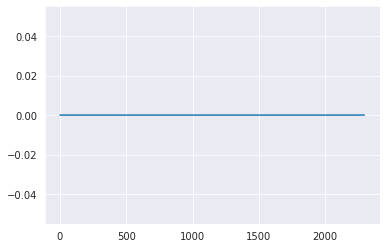

In [8]:
plt.plot(seq)
plt.show()